##### VL = Very low            (1 hotspot)
##### L = Low                      (2 hotspot)
##### M = Medium               (3 hotspot)
##### H = Hard                     (4 hotspot)
##### VH = Very Hard         (>=5 hotspot)
##### EH = Extreme Hard  (string hotspot)
##### 

# imports libs

In [138]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt

In [475]:
def visualize(x,y, w,z):
    plt.figure()
    n_y = []
    for i in y:
        if i == 1 or i == 2:
            n_y.append(1)
        elif i == 3 or i == 4:
            n_y.append(2)
        elif i == 6 or i == 5:
            n_y.append(3)
    print('Azul: Classe 1\tVerde: Classe 2\tRoxo: Classe 3')
    plt.scatter(x[:,0], x[:,1], s=25, c=n_y, cmap="Set2")
    plt.title("Distribuição original")
    plt.xlabel("Isc")
    plt.ylabel("Voc")
    plt.show()
    
    plt.scatter(w[:,0], w[:,1], s=25, c=z, cmap="Set2")
    plt.title("Ditribuição classificada pelo fuzzy")
    plt.xlabel("Isc")
    plt.ylabel("Voc")
    plt.show()
    #plt.plot(x,y)
    #plt.legend()
    

## lendo dados

In [140]:
df = pd.read_csv('hotspot.csv', usecols=['Isc', 'Voc','hotspot'])
df.head()

,Isc,Voc,hotspot
0,1.288825,0.425502,1
1,1.467602,0.765602,1
2,1.148001,0.584855,1
3,1.456785,0.437555,1
4,1.438941,0.500809,1


In [141]:
Isc = ctrl.Antecedent(np.arange(0, 6, 0.001), 'Isc')
Voc = ctrl.Antecedent(np.arange(0, 6, 0.001), 'Voc')

In [142]:
df.groupby('hotspot').describe().T

hotspot             1           2           3           4           5  \
Isc count  100.000000  100.000000  100.000000  100.000000  100.000000   
    mean     1.096738    1.591286    1.933563    2.063821    2.980383   
    std      0.241579    0.387471    0.398734    0.464149    0.504031   
    min      0.702270    0.959229    1.330012    1.333036    2.149895   
    25%      0.873628    1.256469    1.590707    1.688926    2.513698   
    50%      1.081631    1.546909    1.957481    2.041514    2.932991   
    75%      1.315411    1.918173    2.237017    2.439128    3.415380   
    max      1.479774    2.297625    2.688623    2.895933    3.794420   
Voc count  100.000000  100.000000  100.000000  100.000000  100.000000   
    mean     0.550035    1.264568    1.816980    2.176801    2.484900   
    std      0.149265    0.354525    0.240188    0.285708    0.371964   
    min      0.301644    0.652433    1.401747    1.708465    1.882910   
    25%      0.424270    0.933063    1.641682    1.929475    2.136764   
    50%      0.550345    1.298330    1.833963    2.158397    2.544784   
    75%      0.676978    1.574264    2.023171    2.388620    2.818431   
    max      0.796222    1.779849    2.194708    2.691706    3.094826   

hotspot             6  
Isc count  100.000000  
    mean     3.075714  
    std      0.742626  
    min      1.842513  
    25%      2.498787  
    50%      3.024910  
    75%      3.751093  
    max      4.367587  
Voc count  100.000000  
    mean     3.835706  
    std      0.648516  
    min      2.702693  
    25%      3.237202  
    50%      3.850934  
    75%      4.435939  
    max      4.867186

##### funções de pertinência para a redução da tensão em porcentos

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


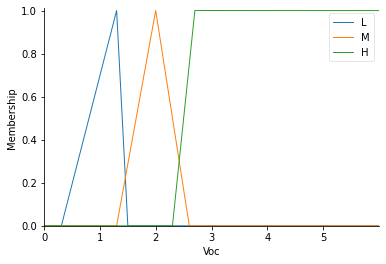

In [448]:
Voc['L'] = fuzz.trimf(Voc.universe, [0.31, 1.3, 1.5])#[0.31, 1.58, 1.7]
Voc['M'] = fuzz.trimf(Voc.universe, [1.3, 2.0, 2.6]) #[1.4, 2.4, 3.0]
Voc['H'] = fuzz.trimf(Voc.universe, [2.3 , 2.7, 10000.0])#[2.2 , 2.9, 10000.0]
Voc.view()

##### funções de pertinência para a redução da corrente em porcentos

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


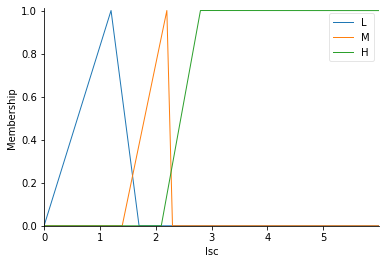

In [460]:
Isc['L'] = fuzz.trimf(Isc.universe, [0.0, 1.2, 1.7])#[0.0, 1.4, 1.9]
Isc['M'] = fuzz.trimf(Isc.universe, [1.4, 2.2, 2.3])#[1.4, 2.6, 3.1]
Isc['H'] = fuzz.trimf(Isc.universe, [2.1 , 2.8, 10000.0])#[2.5 , 3.4, 10000.0]
Isc.view()

##### pertinence function for output membership function (OMF) 

In [461]:
omf = ctrl.Consequent(np.arange(0, 1, 0.01), 'omf')
omf

Consequent: omf

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


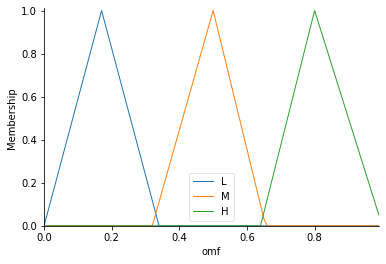

In [462]:
omf['L'] = fuzz.trimf(omf.universe, [0.0, 0.17, 0.34])
omf['M'] = fuzz.trimf(omf.universe, [0.32, 0.5, 0.655])
omf['H'] = fuzz.trimf(omf.universe, [0.64, 0.8, 1])
omf.view()

In [463]:
def classe_saida(entrada):
    if entrada >=0 and entrada <=0.34:
        return 1,2
    elif entrada >=0.32 and entrada <=0.65:
        return 3,4
    elif entrada >=0.64:
        return 5,6

# rules of output

In [464]:
rule1 = ctrl.Rule(Isc['L'] & Voc['L'], omf['L'])
rule2 = ctrl.Rule(Isc['L'] & Voc['M'], omf['M'])
rule3 = ctrl.Rule(Isc['M'] & Voc['L'], omf['L'])
rule4 = ctrl.Rule(Isc['M'] & Voc['M'], omf['M'])
rule5 = ctrl.Rule(Isc['M'] & Voc['M'], omf['M'])
rule6 = ctrl.Rule(Isc['M'] & Voc['H'], omf['M'])
rule7 = ctrl.Rule(Isc['H'] & Voc['H'], omf['H'])
rule8 = ctrl.Rule(Isc['H'] & Voc['M'], omf['H'])

In [465]:
hot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
hot_simulador = ctrl.ControlSystemSimulation(hot_ctrl)

In [466]:
saidas = list(df.hotspot)

In [467]:
x=0
y=0
z=0
h=0
datas = []
ind = []
predito = []

for i in df.values:
    try:
        hot_simulador.input['Isc'] = i[0]
        hot_simulador.input['Voc'] = i[1]

        # Computando o resultado
        hot_simulador.compute()

        #print(classe_saida(hot_simulador.output['omf']), i[2])
        datas.append(i)
        
        if 1 in classe_saida(hot_simulador.output['omf']):
            predito.append(1)
        elif 3 in classe_saida(hot_simulador.output['omf']):
            predito.append(2)
        elif 5 in classe_saida(hot_simulador.output['omf']):
            predito.append(3)
            
        if i[2] in classe_saida(hot_simulador.output['omf']):
            x+=1
        else:
            y+=1
        
    except:
        x+=1
        ind.append(h)
        #prind.append(h)int(f"An exception occurred {i}")
    h+=1

In [472]:
print(f'Acurácia para classificação: {x/len(datas)}')

Acurácia para classificação: 0.7885906040268457


Azul: Classe 1	Verde: Classe 2	Roxo: Classe 3


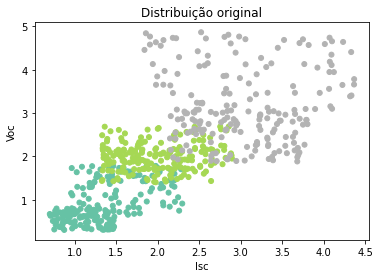

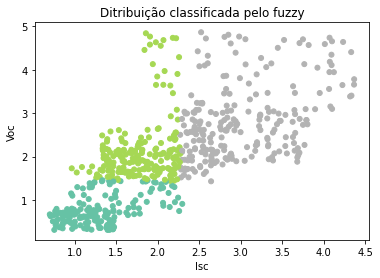

In [476]:
visualize(df.drop('hotspot', axis=1).values, df['hotspot'], np.array(datas), predito)

In [17]:
# Entrando com alguns valores para qualidade da comida e do serviço
hot_simulador.input['Isc'] = 1.8#2.05
hot_simulador.input['Voc'] = 0.92#1.1


# Computando o resultado
hot_simulador.compute()
print(hot_simulador.output)

OrderedDict([('omf', 0.17000000000000007)])


/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


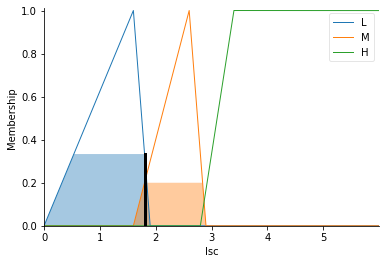

In [18]:
Isc.view(sim=hot_simulador)

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


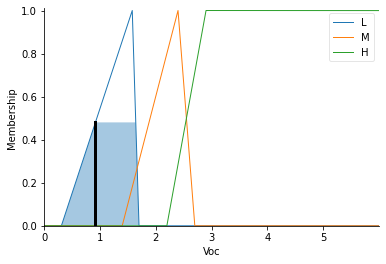

In [19]:
Voc.view(sim=hot_simulador)

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


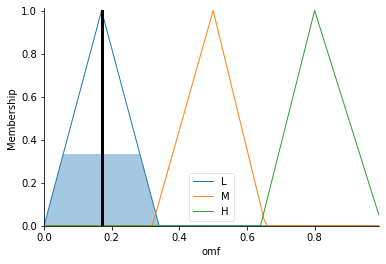

In [20]:
omf.view(sim=hot_simulador)